**Obrada informacija**: Prva laboratorijska vježba

Rijeke imaju veliki gospodarski značaj, od termoelektrana i nuklearnih elektrana kojima su rijeke nužne za rad, javne vodoopskrbe do poljoprivrede i transporta. Premda ljudi danas uvelike upravljaju vodotocima, uslijed vremenskih prilika ipak može doći do poplava, erozija tla i sličnih prirodnih nepogoda. Kako bismo se mogli na vrijeme pripremiti za potencijalne probleme, potrebno je istražiti ponašanje rijeka na temelju višegodišnjih praćenja vodostaja. U ovoj laboratorijskoj vježbi ćete analizirati vodostaje rijeke Save kroz period od 25 godina.

Unutar komprimiranog direktorija u kojem se nalazi ova bilježnica, nalazi se i .mat datoteka s podacima o vodostaju rijeke Save u periodu od 1.1.1982. do 31.12.2007. Svaki podatak označava jedan dan mjerenja vodostaja. 

Vježba se izvodi u Pythonu/Google Colabu, a sve naredbe potrebne za provedbu vježbe te njihova objašnjenja dana su u predavanju. Ova laboratorijska vježba nosi 3 boda. 

Kad ste gotovi s vježbom, na *Moodle* postavite .pdf izvješće s vježbe (.pdf izvješće možete generirati s naredbom File-Print-Location: PDF). 

**1.**	Učitajte biblioteke: NumPy, matplotlib.pyplot, scipy.fft, signal iz scipy te pywt.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy import signal
import pywt
import matplotlib.dates as mdates

**2.**	Učitajte podatke o vodostaju iz .mat datoteke koja se nalazi unutar istog komprimiranog direktorija. Učitani podaci su spremljeni u rječnik. Izdvojite ključ i pripadne podatke o vodostajima te po potrebi smanjite dimenziju.

Savjet: .mat datoteku učitajte sa svog Google Drivea (unutar mape Colab Notebooks na svom Google Driveu postavite .mat datoteku). Ostali savjeti nalaze se u sljedećem programskom odsječku. 

In [3]:
from scipy import io
kobas_iz_matlaba=io.loadmat("3_OIkobas.mat")
kobas = kobas_iz_matlaba['kobas'].flatten()
print(kobas_iz_matlaba)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Sat Oct 10 13:46:29 2020', '__version__': '1.0', '__globals__': [], 'kobas': array([[661],
       [674],
       [685],
       ...,
       [242],
       [230],
       [228]], dtype=uint16)}


**3.**	Ispišite: broj dana za koje postoje podaci o vodostajima, srednju vrijednost vodostaja, standardnu devijaciju, minimalnu vrijednost, maksimalnu vrijednost te median.

In [4]:
broj_dana = kobas.size # kobas je tipa numpy.ndarray
print(f"Broj dana: {broj_dana}")

srednja_vrijednost_vodostaja = kobas.mean()
print(f"Srednja vrijednost vodostaja: {srednja_vrijednost_vodostaja}")

std_vodostaja = kobas.std()
print(f"Standardna devijacija vodostaja: {std_vodostaja}")

min_vodostaja = kobas.min()
print(f"Minimalna vrijednost vodostaja: {min_vodostaja}")

max_vodostaja = kobas.max()
print(f"Maksimalna vrijednost vodostaja: {max_vodostaja}")

medijan_vodostaja = np.median(kobas)
print(f"Medijan vodostaja: {medijan_vodostaja}")


Broj dana: 9496
Srednja vrijednost vodostaja: 294.25758213984835
Standardna devijacija vodostaja: 183.09167165945507
Minimalna vrijednost vodostaja: 17
Maksimalna vrijednost vodostaja: 878
Medijan vodostaja: 255.0


**4.** Nacrtajte vodostaj. Obilježite x i y os te naslov slike. 

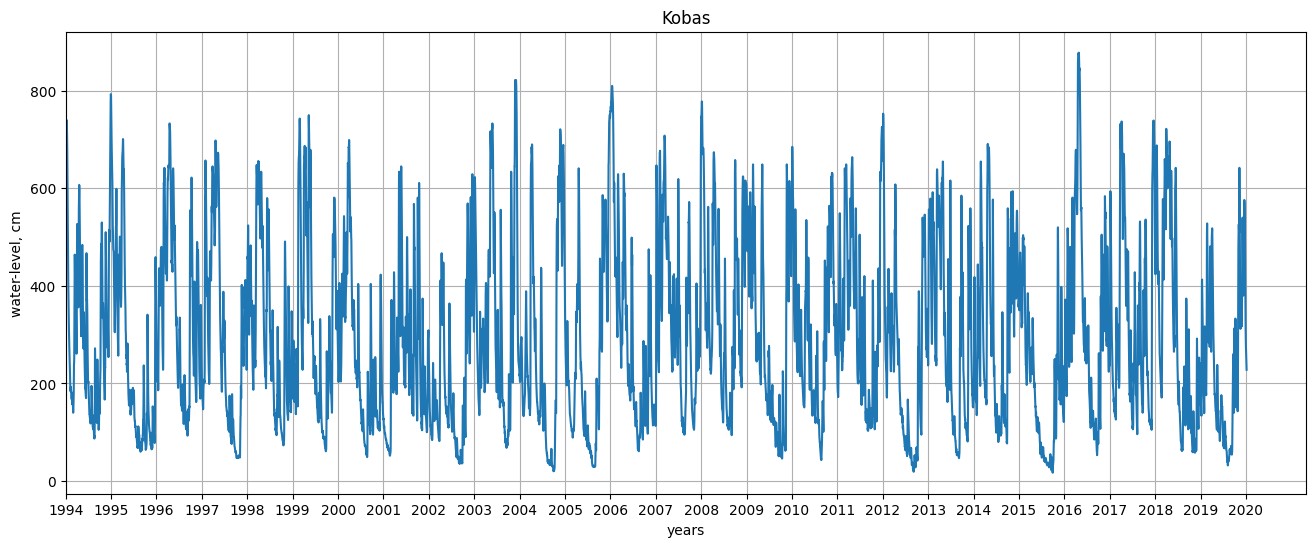

In [5]:
end_datum = '2020-10-10'
start_datum = np.datetime64(end_datum) - np.timedelta64(broj_dana, 'D')

datumi = np.arange(start_datum, np.datetime64(end_datum), dtype='datetime64[D]')

plt.figure(figsize=(16,6))
plt.plot(datumi, kobas)
plt.xlabel('years')
plt.ylabel('water-level, cm')
plt.title('Kobas')
plt.grid(True)

plt.xlim(start_datum)

ax = plt.gca()
plt.xticks([start_datum + np.timedelta64(i) for i in range(0, broj_dana, 365)])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()

**5.**	Izračunajte diskretnu Fourierovu transformaciju zadanog vodostaja. Ispišite dobivene vrijednosti. Nacrtajte apsolutnu vrijednost dobivenih koeficijenata.

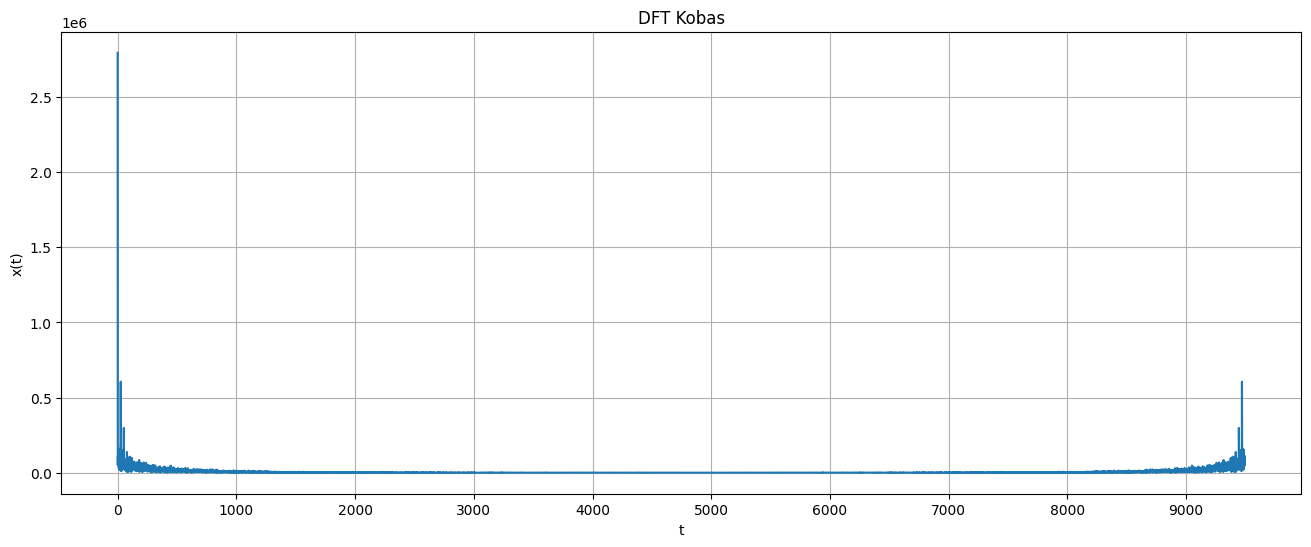

In [12]:
transform = fft(kobas)
n = len(transform)
vrijeme = np.arange(n)

abs_transform = np.abs(transform)

plt.figure(figsize=(16,6))
plt.plot(vrijeme, abs_transform)
plt.xticks(np.arange(0,n,1000))
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('DFT Kobas')
plt.grid(True)
plt.show()


**6.**	Izračunajte Fourierovu transformaciju na vremenskom otvoru zadanog vodostaja koristeći pravokutni otvor širine 2 godine. Prikažite rezultat pomoću pcolormesh. Odgovorite: koje frekvencije su vidljive u vodostaju? Koje godine se javljaju?

In [7]:
# Ovo je mjesto na kojem možete izvoditi svoj kod. 

ODGOVOR: *Ovo je mjesto za odgovor na pitanja iz 6. zadatka.*

**7.**	Upotrijebite drugu širinu otvora (po izboru) i ponovite prethodni zadatak. Ispišite koju širinu ste upotrijebili. Objasnite razlike u dobivenim slikama.

In [8]:
# Ovo je mjesto na kojem možete izvoditi svoj kod. 

ODGOVOR: *Ovo je mjesto za odgovor na pitanje iz 7. zadatka.*

**8.**	Ispišite sve obitelji kontinuiranih valića koje se nalaze u PyWavelets biblioteci. Na istoj slici, koristeći subplot naredbu, nacrtajte dvije valićne funkcije po izboru. U naslovu svake slike napišite o kojim valićima se radi.

In [9]:
# Ovo je mjesto na kojem možete izvoditi svoj kod. 

**9.**	Koristeći Morlet valić, odredite kontinuiranu valićnu transformaciju zadanog vodostaja. Nacrtajte apsolutnu vrijednost dobivenih koeficijenata. Odgovorite: koje frekvencije su vidljive u vodostaju? Koje godine se javljaju?

In [10]:
# Ovo je mjesto na kojem možete izvoditi svoj kod. 

ODGOVOR: *Ovo je mjesto za odgovor na pitanja iz 9. zadatka.*

**10.**	Odgovorite: objasnite razliku u dobivenim rezultatima STFT i CWT.

ODGOVOR: *Ovo je mjesto za odgovor na pitanje iz 10. zadatka.*